# Hydrostatics of a rectangular barge

This is a validation for the calculation of the hydrostatic properties of a rectangular shape. The shape is obtained from a panel mesh.

The values calculated by DAVE are compared with the analytical solution.

In [1]:
from DAVE import *

Equilibrium-core version = 1.0
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe


## Input

Define the size of the barge


In [2]:
length = 100
width = 20
depth = 8
draft = 4


Define the heel angle for numerical BM calculation

In [3]:
phi = 1  # degrees

## Setup the model

In [4]:
s = Scene()
vessel = s.new_axis('Vessel')

# code for Buoyancy mesh
mesh = s.new_buoyancy(name='Buoyancy mesh',
          parent='Vessel')
mesh.trimesh.load_obj(s.get_resource_path(r'cube.obj'), scale = (length,width,depth), rotation = (0.0,0.0,0.0), offset = (0.0,0.0,0.0))

Update the state of the scene, this is required to force the calculation of the updated mesh. This is normally done automatically when solving statics, but we are not doing that here.

In [5]:
s.update()

embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


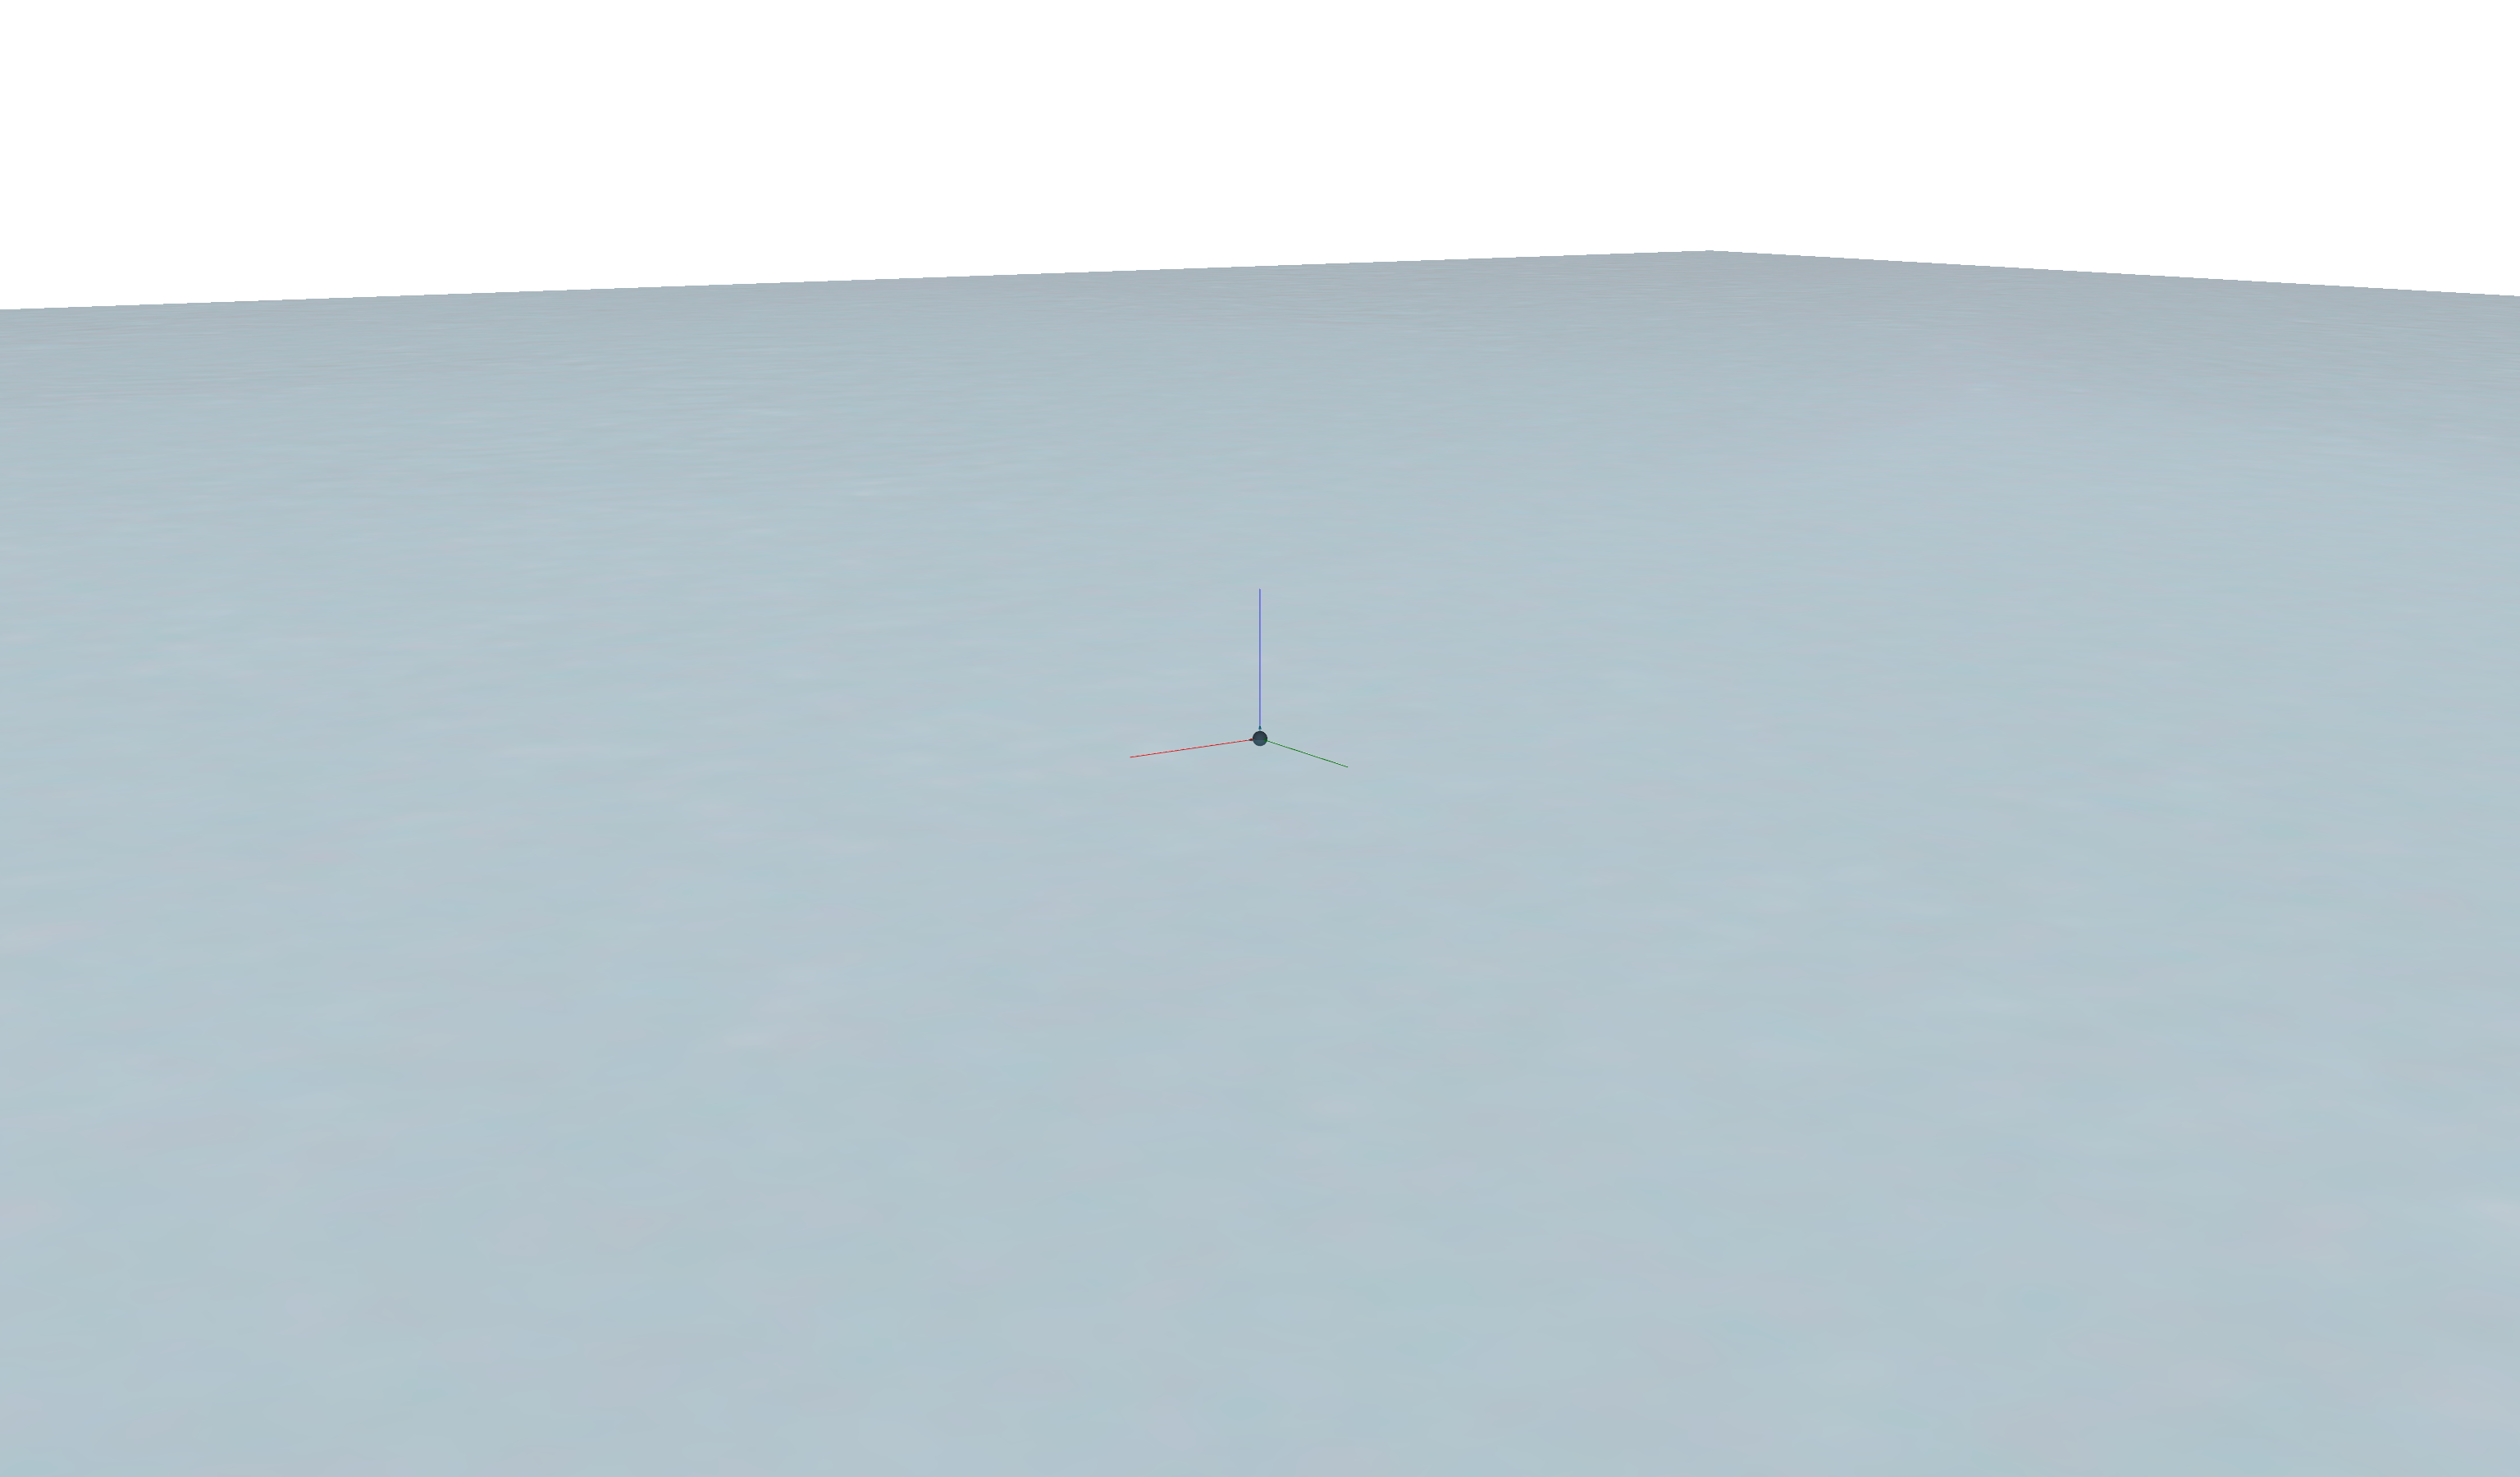

In [6]:
from DAVE.jupyter import *
show(s, camera_pos=(100,150,40))

# Checks

## Displacement

The displacement [$m^3$] should equal $length * width * draft$



In [7]:
expected_displacement = length * width * draft

In [8]:
from IPython.display import Markdown as md
md(f'### Expected = {expected_displacement} \n ### Actual = {mesh.displacement}')

### Expected = 8000 
 ### Actual = 7999.999999999999

## CoB

The CoB should be at 0,0,-0.5*draft

In [9]:
md(f'### Expected = (0,0,-{0.5*draft})  \n### Actual = {mesh.cob}')

### Expected = (0,0,-2.0)  
### Actual = (0.0, 0.0, -1.9999999999999998)

## BM

The BM value is a linearized value for the stability. It describes the horizontal movement of the CoB as effect of a small heel angle. This relation is as follows:

$ \Delta CoB_y = BM \cdot sin(\phi) $

where $ \phi $ is small

The BM value can also be calculated as follows:

$BM = \frac{I_{xx}} {displacement}$

where

$I_{xx} = \frac{1}{12} \cdot length \cdot width^3$

In [10]:
Ixx = (1/12) * length * width**3
displacement = length * width * draft
BM_expected = Ixx / displacement
print(f'BM_expected = {BM_expected}m')

BM_expected = 8.333333333333332m


In [11]:
coby0 = mesh.cob[1]


We need to rotate the vessel about its CoB. To easily do that we create a new axis system at the current cob postion, attach the vessel to that, and then rotate that new axis system.

In [12]:
driver = s.new_axis('heel_driver',position=mesh.cob)
vessel.change_parent_to(driver)
driver.rotation = (phi,0,0) # give the vessel a 1 degree positive heel angle

In [13]:
s.update()
coby1 = mesh.cob[1]

In [14]:
import numpy as np
BM_calculated = -(coby1-coby0) /  np.sin(np.radians(1))

In [15]:
md(f'### Expected = {BM_expected}m  \n### Actual = {BM_calculated}m')

### Expected = 8.333333333333332m  
### Actual = 8.334120409897812m

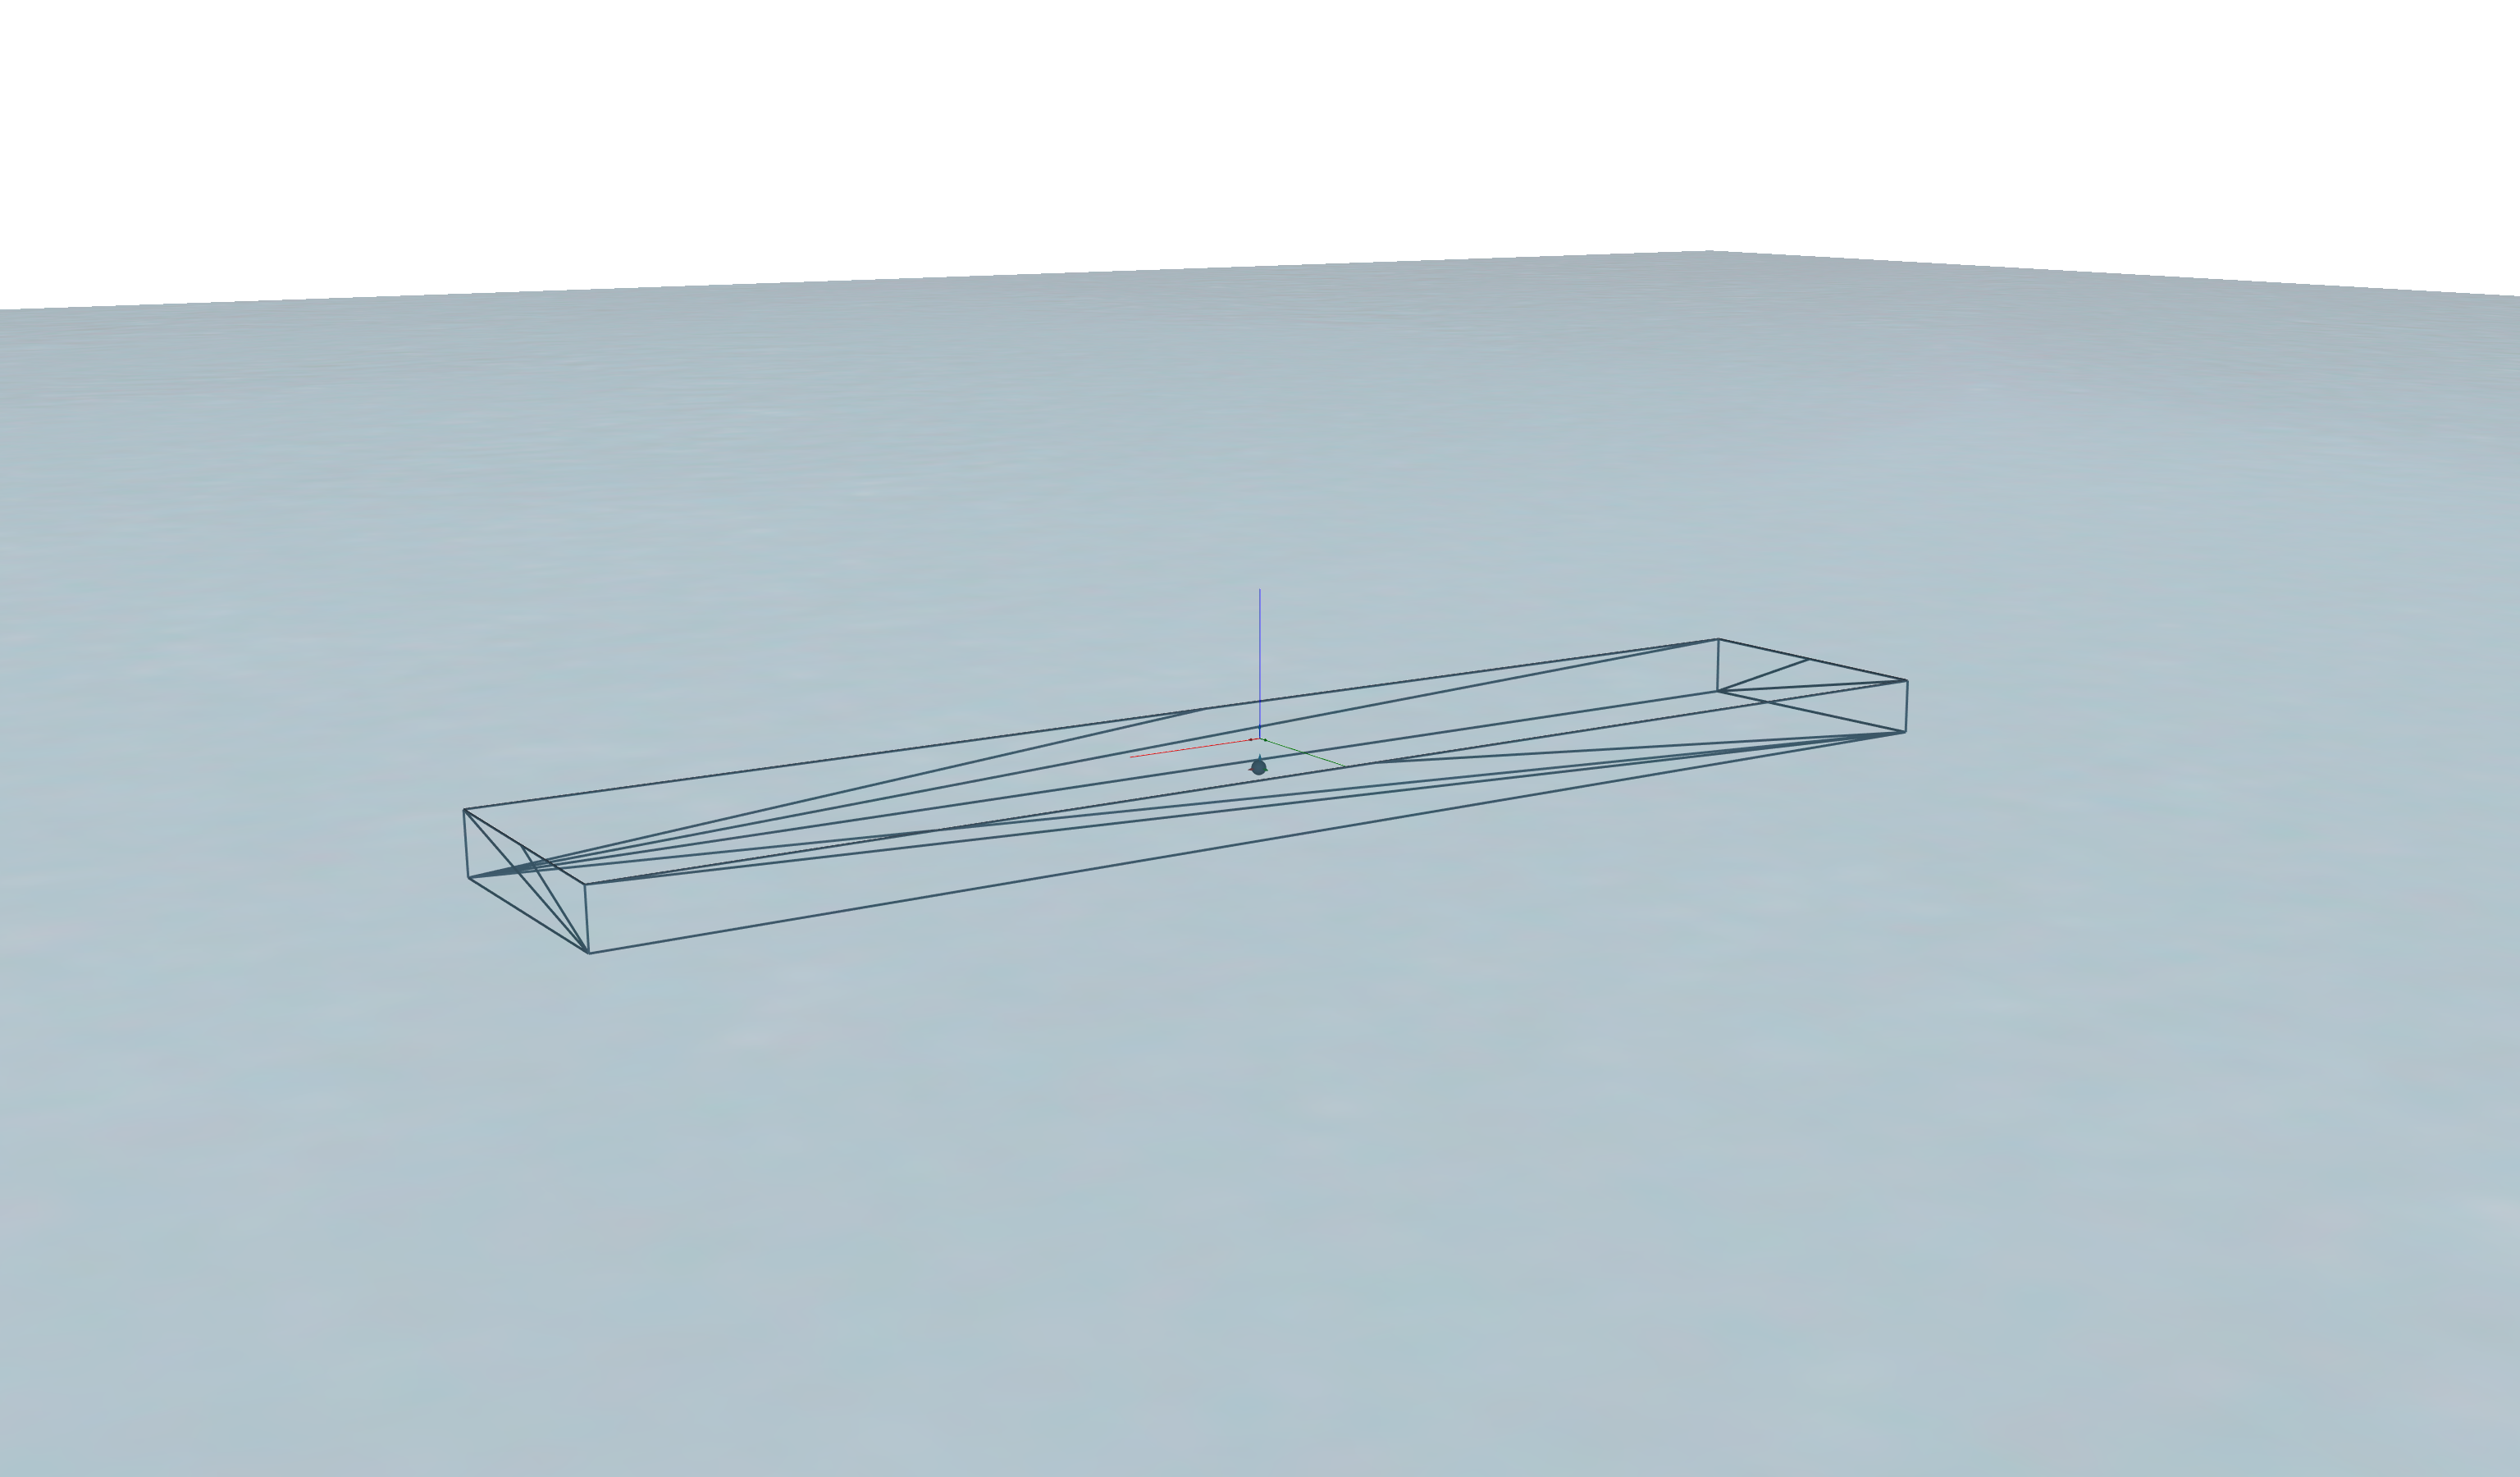

In [16]:
from DAVE.jupyter import *
show(s, camera_pos=(100,150,40))